In [2]:
from pandas import read_csv, DataFrame 

from seaborn import heatmap
from sklearn.decomposition import PCA

from scripts.dataset_analyse import pca_visualize_categories, biplot, elbow_chart
from scripts.dataset_preprocessing import scale_dataframe

In [3]:
dataframe = read_csv("../data/cleaned/marketing_campaign_fillna_no_outliers.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2230 non-null   int64  
 1   Education            2230 non-null   int64  
 2   Marital_Status       2230 non-null   int64  
 3   Income               2230 non-null   float64
 4   Kidhome              2230 non-null   int64  
 5   Teenhome             2230 non-null   int64  
 6   Dt_Customer          2230 non-null   int64  
 7   Recency              2230 non-null   int64  
 8   MntWines             2230 non-null   int64  
 9   MntFruits            2230 non-null   int64  
 10  MntMeatProducts      2230 non-null   int64  
 11  MntFishProducts      2230 non-null   int64  
 12  MntSweetProducts     2230 non-null   int64  
 13  MntGoldProds         2230 non-null   int64  
 14  NumDealsPurchases    2230 non-null   int64  
 15  NumWebPurchases      2230 non-null   i

In [4]:
dataframe.drop(columns=['Marital_Status', 'Education', 'MntFruits', 'AcceptedCmp2', 'Response', 'NumCatalogPurchases' , 'Dt_Customer', 'Teenhome', 'Recency', 'AcceptedCmp3', 'Complain', 'Kidhome', 'NumWebVisitsMonth', 'MntWines', 'MntFishProducts', 'MntMeatProducts','MntSweetProducts', 'MntGoldProds', 'NumWebPurchases','NumStorePurchases', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp1', 'NumDealsPurchases', 'Family_Size'], inplace=True)
dataframe.to_csv('../data/cleaned/marketing_campaign_reduction_drop_columns.csv', index=False)
dataframe = scale_dataframe(dataframe)

<Axes: >

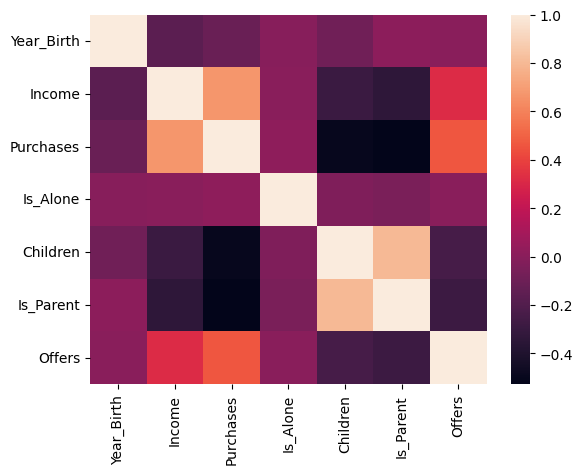

In [5]:
correlation_matrix = dataframe.corr()
heatmap(correlation_matrix)

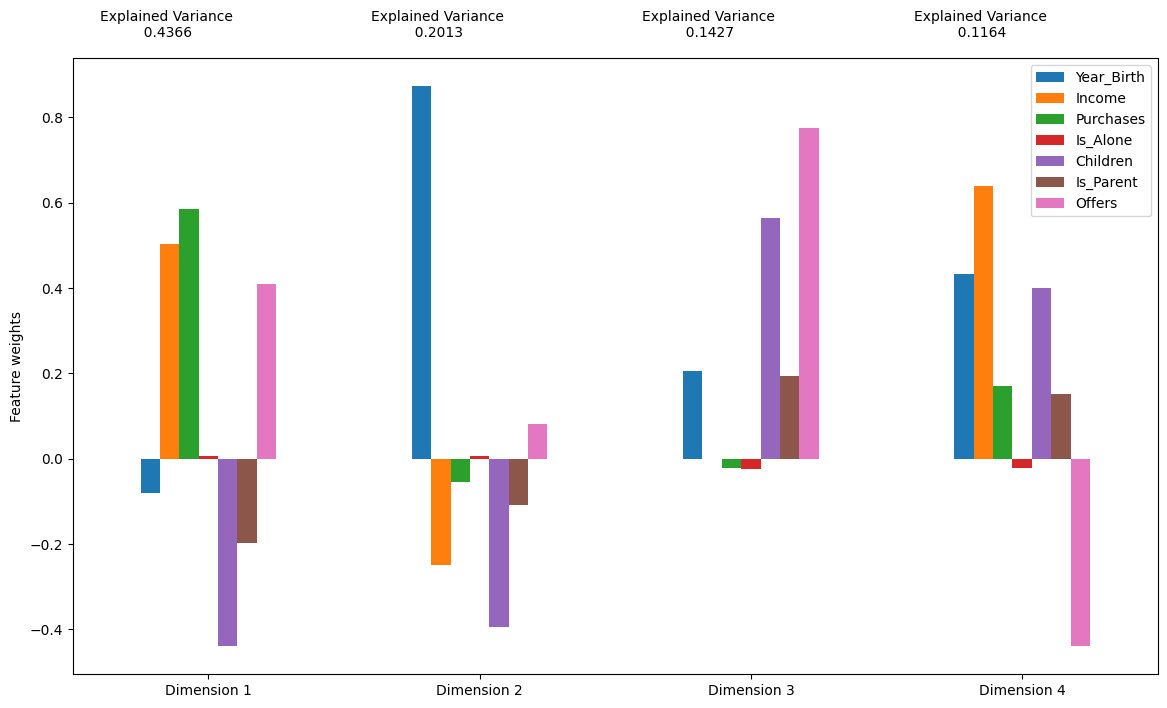

In [6]:
pca = PCA(n_components=4)
pca = pca.fit(dataframe)
pca_visualize_categories(dataframe, pca) #NOTE afficher sous forme de score, et/ou par 2

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='principal_component_1', ylabel='principal_component_2'>

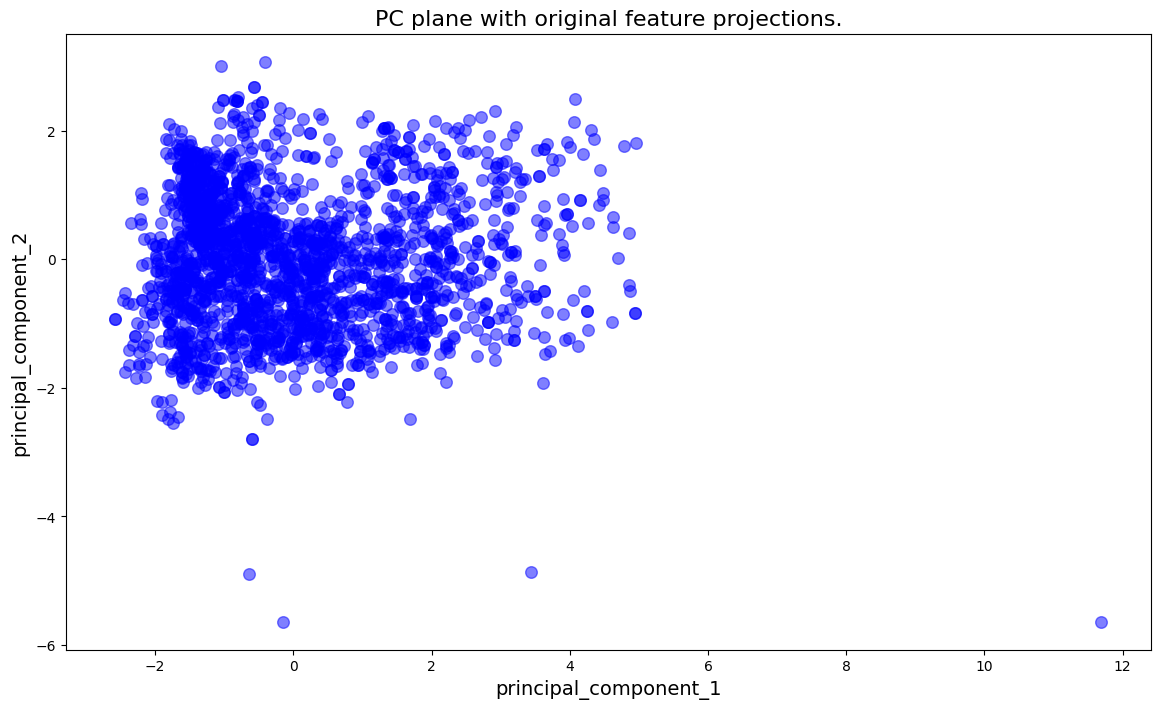

In [7]:
pca = PCA(n_components=2)
pca = pca.fit(dataframe)
principal_components = pca.transform(dataframe)
principal_dataframe = DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
biplot(principal_dataframe)

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='principal_component_1', ylabel='principal_component_2'>

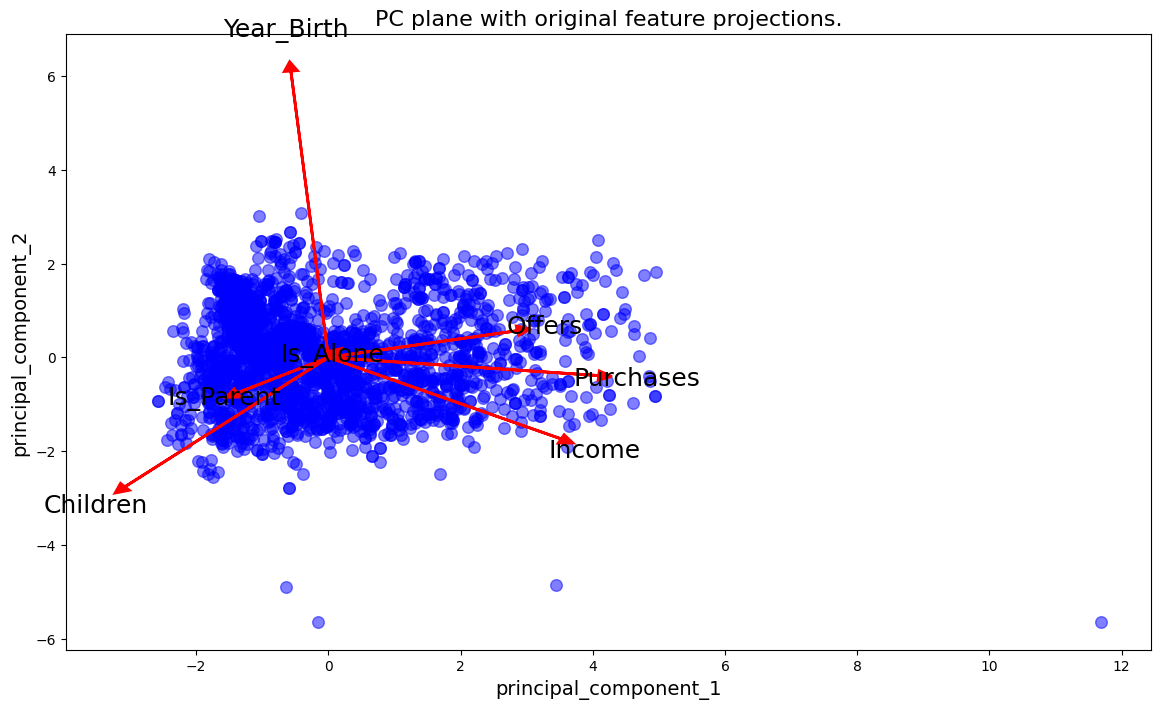

In [8]:
biplot(principal_dataframe, pca, dataframe)

In [9]:
# TODO Other Graph

# Elbow chart
As we can see on the elbow chart, the optimal number of clusters is **3**

In [10]:
principal_dataframe.to_csv('../data/cluster/marketing_campaign_principal_component.csv', index=False)